In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")


In [4]:
count = police_killings["raceethnicity"].value_counts()

([<matplotlib.axis.XTick at 0x10b41ec50>,
 <a list of 6 Text xticklabel objects>)

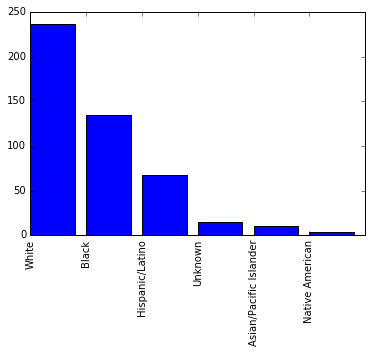

In [5]:
%matplotlib inline

plt.bar(range(6), count)
plt.xticks(range(6), count.index, rotation="vertical")


In [6]:
avg = count/sum(count)

([<matplotlib.axis.XTick at 0x10b700d10>,
 <a list of 6 Text xticklabel objects>)

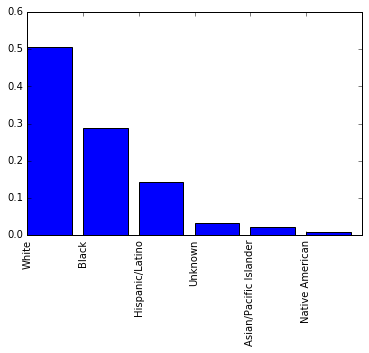

In [7]:
%matplotlib inline

plt.bar(range(6), avg)
plt.xticks(range(6), avg.index, rotation="vertical")


Percentage of total who get killed by police

In [8]:
USpop = [.63,.132,.14,.028,.06,.01]
         

In [9]:
proportion = avg
for i in range(len(avg)):
    proportion[i] = proportion[i]/USpop[i]

by having ["p_income"] come first, we are now in that column, with second part we clean


In [10]:
proportion

White                     0.802148
Black                     2.189994
Hispanic/Latino           1.024778
Unknown                   1.147140
Asian/Pacific Islander    0.356888
Native American           0.856531
Name: raceethnicity, dtype: float64

([<matplotlib.axis.XTick at 0x10b731d50>,
 <a list of 6 Text xticklabel objects>)

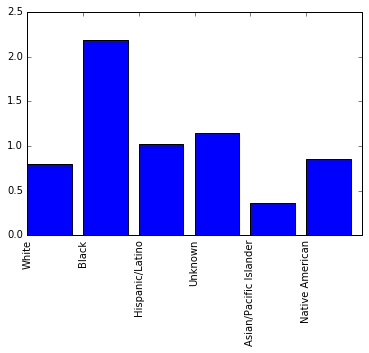

In [11]:
%matplotlib inline

plt.bar(range(6), proportion)
plt.xticks(range(6), proportion.index, rotation="vertical")


Ratio of race killed compared to population percentage

In [12]:
income = police_killings["p_income"][police_killings["p_income"] != "-"]


(array([  25.,  179.,  152.,   73.,   26.,    6.,    2.,    1.,    0.,    1.]),
 array([  5457. ,  13513.6,  21570.2,  29626.8,  37683.4,  45740. ,
         53796.6,  61853.2,  69909.8,  77966.4,  86023. ]),
 <a list of 10 Patch objects>)

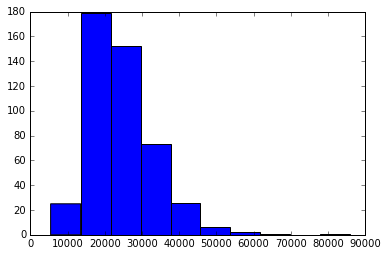

In [13]:
plt.hist(income.astype(int))

Income is based on the area of death, not where person is from

In [14]:
state_pop = pd.read_csv("statepopulation.csv")

In [15]:
counts = police_killings["state_fp"].value_counts()

In [16]:
states = pd.DataFrame({"STATE": counts.index,"shootings":counts})

In [17]:
states = pd.merge(state_pop,states,on = "STATE")

In [18]:
states['pop_million'] = states['POPESTIMATE2015']/1000000

In [19]:
states['rate'] = states['shootings']/states['pop_million']

In [20]:
direct = pd.DataFrame({"Name":states['NAME'], "Ratio": states['rate']})
states.sort(columns = 'rate')

/Users/allenlu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings,pop_million,rate
6,40,1,1,9,Connecticut,3590886,2826827,78.7,1,3.590886,0.278483
37,40,1,2,42,Pennsylvania,12802503,10112229,79.0,7,12.802503,0.546768
15,40,2,4,19,Iowa,3123899,2395103,76.7,2,3.123899,0.640226
32,40,1,2,36,New York,19795791,15584974,78.7,13,19.795791,0.656705
21,40,1,1,25,Massachusetts,6794422,5407335,79.6,5,6.794422,0.735898
29,40,1,1,33,New Hampshire,1330608,1066610,80.2,1,1.330608,0.751536
19,40,1,1,23,Maine,1329328,1072948,80.7,1,1.329328,0.752260
13,40,2,3,17,Illinois,12859995,9901322,77.0,11,12.859995,0.855366
34,40,2,3,39,Ohio,11613423,8984946,77.4,10,11.613423,0.861073
45,40,2,3,55,Wisconsin,5771337,4476711,77.6,5,5.771337,0.866350


We observe east coasts states tend to have a lower death rate, while west coast states have a higher rate. 

In [30]:
pk = police_killings[
    (police_killings["share_white"] != "-") & 
    (police_killings["share_black"] != "-") & 
    (police_killings["share_hispanic"] != "-")
]
pk['share_white'] = pk['share_white'].astype(float)
pk['share_black'] = pk['share_black'].astype(float)
pk['share_hispanic'] = pk['share_hispanic'].astype(float)



/Users/allenlu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/allenlu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/allenlu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [34]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]
ls = pk[pk['state'].isin(lowest_states)]
hs = pk[pk['state'].isin(highest_states)]

In [35]:
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

ls[columns].mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [36]:
hs[columns].mean()


pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

It seems states with higher rate of shooting have more hispanics, while states with lower rate of shooting has lower african americans